In [1]:
from src.datasets import CBISLesionDataset
from src.pipeline.breast import BreastImageProcessingPipeline
from torch.utils.data import DataLoader
from src.operations.transform import crop_to_roi, resize_square
from src.operations.normalize import truncate_normalization, normalize_int8
import matplotlib.pyplot as plt

pipeline = BreastImageProcessingPipeline()

train = CBISLesionDataset('/mnt/d/datasets/CBIS/data', pipeline, True)
test = CBISLesionDataset('/mnt/d/datasets/CBIS/data', pipeline, False)

In [2]:
train_loader = DataLoader(train, 8, shuffle=False, num_workers=8)
data = next(iter(train_loader))

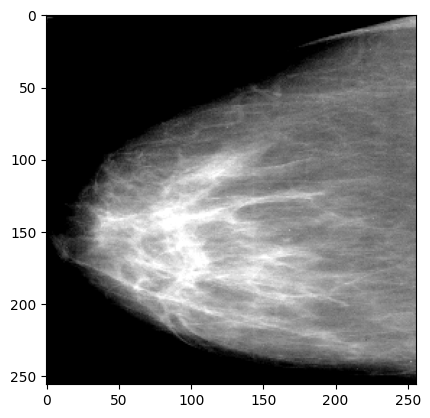

In [5]:
plt.imshow(data[0][2], cmap='gray')
plt.show()

In [66]:
import cv2
import numpy as np

original_image = data[0][2].cpu().numpy()
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(original_image)

In [ ]:
def calculate_psnr(original, processed):
    if original.shape != processed.shape:
        raise ValueError("Input images must have the same dimensions")
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255.0
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr